<h1 style="color:rgb(0,120,170)">Assignment 7: First Neural Networks and a glimpse at Pytorch </h1>

<h2 style="color:rgb(0,120,170)">Task 1: The XOR problem</h2>

In this task we try to formalize the fact that a single layer NN cannot solve the XOR problem, but a two layer network can. 
Let us assume that we have only four possible inputs $\mathbf{x}_1 = (0,0)$,
$\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$ with the following labels $y_1=0$, $y_2=1$, $y_3=1$, and $y_4=0$, respectively. Note that this exactly describes the XOR function (it outputs 1 (=true) if and only if exactly one of the inputs' components equals 1 (=true)).  
* As a first task show that if we use a linear network
$
    g_1(\mathbf{x};\mathbf{w})= \mathbf{x} \cdot \mathbf{w} = x^1 w_1 + x^2  w_2,
$
 it is impossible to find parameters $w_1$ and $w_2$
  that solve this problem exactly.

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

Let's put in the points with their labels into the linear network and look if they contrdict themselves. <br>
$x^2$ could be confused with the quadratic formula. Therefore, I will write $ x = (x_a, x_b) $. <br>
<br>
Firstly, put $x_1 = (0, 0); y_1 = 0$ into function g:
\begin{align*}
y = g_1(x;w) &= x_a w_1 + x_b w_2\\
0 &= 0 w_1 + 0 w_2
\end{align*}
--> $w_1$ and $w_2$ can be arbitrarily chosen because the function output will always be 0 no matter what you put in <br><br>
Put in $x_2 = (1, 0); y_2 = 1$:
\begin{align*}
1 = 1 w_1 + 0 w_2
\end{align*}
--> $w_1 = 1$ and $w_2$ can be chosen arbitrarily.<br><br>
Put in $x_3 = (0, 1); y_2 = 1$:
\begin{align*}
1 = 0 w_1 + 1 w_2
\end{align*}
--> $w_2 = 1$ and $w_1$ can be arbitrarily chosen<br>
--> From already observed we get $w_1 = 1$ and $w_2 = 1$<br><br>
Put in $x_4 = (1, 1); y_2 = 0$:
\begin{align*}
0 = 1 w_1 + 1 w_2 
\end{align*}
--> $w_1 = -w_2$<br>
But this last observation is a contradiction to the observations of putting in $x_2$ and $x_3$ ($w_1 = w_2 = 1$)!<br>
--> There is no solution for $w_1$ and $w_2$ by using the linear network $g_1$.<br><br>

 Even by adding bias units or by applying a sigmoid, the problem 
    cannot be solved. 
    However, as soon as we use a two-layer network with a simple non-linear activation function (ReLU):
    $$   
    g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}), 
    $$
   we can find parameters, that solve the problem. 
   * Concretely, show that $\mathbf{W}^{[1]}=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$,
    $\mathbf{b}=\begin{pmatrix} 0 \\ -1 \end{pmatrix}$, and $\mathbf{W}^{[2]}=\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ solve the problem
    in an exact way. The transformation $\max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b})$ has 
    mapped the points $ \mathbf{x}_1,\ldots,  \mathbf{x}_4$ into a space, in which those data points a 
    linearly separable. 

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>

First have a look at the $max(0, W^{[1]}x +b)$ part. Put in all x-es in see what happens:<br>
<br>
Start with $x_1$
\begin{align*}
max(0,W^{[1]}x + b) &=
max\left(0,\left(\begin{matrix}1 & 1\\ 1 & 1\end{matrix}\right)  \left(\begin{matrix}0\\ 0\end{matrix}\right) + \left(\begin{matrix}0\\  -1\end{matrix}\right)\right)
= max\left(0,\left(\begin{matrix}0\\ 0\end{matrix}\right) + \left(\begin{matrix}0\\ -1\end{matrix}\right)\right)\\ 
&= max\left(\left(\begin{matrix}0\\ 0\end{matrix}\right),\left(\begin{matrix}0\\ -1\end{matrix}\right)\right) 
= \left(\begin{matrix}0\\ 0\end{matrix}\right)
\end{align*}

Go on with $x_2$:
\begin{align*}
max(0,W^{[1]}x + b) &=
max\left(0,\left(\begin{matrix}1 & 1\\ 1 & 1\end{matrix}\right)  \left(\begin{matrix}1\\ 0\end{matrix}\right) + \left(\begin{matrix}0\\  -1\end{matrix}\right)\right)
= max\left(0,\left(\begin{matrix}1\\ 1\end{matrix}\right) + \left(\begin{matrix}0\\ -1\end{matrix}\right)\right)\\ 
&= max\left(\left(\begin{matrix}\\ 0\end{matrix}\right),\left(\begin{matrix}1\\ 0\end{matrix}\right)\right) 
= \left(\begin{matrix}1\\ 0\end{matrix}\right)
\end{align*}

Go on with $x_3$:
\begin{align*}
max(0,W^{[1]}x + b) &=
max\left(0,\left(\begin{matrix}1 & 1\\ 1 & 1\end{matrix}\right)  \left(\begin{matrix}0\\ 1\end{matrix}\right) + \left(\begin{matrix}0\\  -1\end{matrix}\right)\right)
= max\left(0,\left(\begin{matrix}1\\ 1\end{matrix}\right) + \left(\begin{matrix}0\\ -1\end{matrix}\right)\right)\\ 
&= max\left(\left(\begin{matrix}0\\ 0\end{matrix}\right),\left(\begin{matrix}1\\ 0\end{matrix}\right)\right) 
= \left(\begin{matrix}1\\ 0\end{matrix}\right)
\end{align*}

Go on with $x_4$:
\begin{align*}
max(0,W^{[1]}x + b) &=
max\left(0,\left(\begin{matrix}1 & 1\\ 1 & 1\end{matrix}\right)  \left(\begin{matrix}1\\ 1\end{matrix}\right) + \left(\begin{matrix}0\\  -1\end{matrix}\right)\right)
= max\left(0,\left(\begin{matrix}2\\ 2\end{matrix}\right) + \left(\begin{matrix}0\\ -1\end{matrix}\right)\right)\\ 
&= max\left(\left(\begin{matrix}0\\ 0\end{matrix}\right),\left(\begin{matrix}2\\ 1\end{matrix}\right)\right) 
= \left(\begin{matrix}2\\ 1\end{matrix}\right)
\end{align*}

When you draw the resulting values in a two dimensional plane you can see that we are now able to separate the classes linearly:
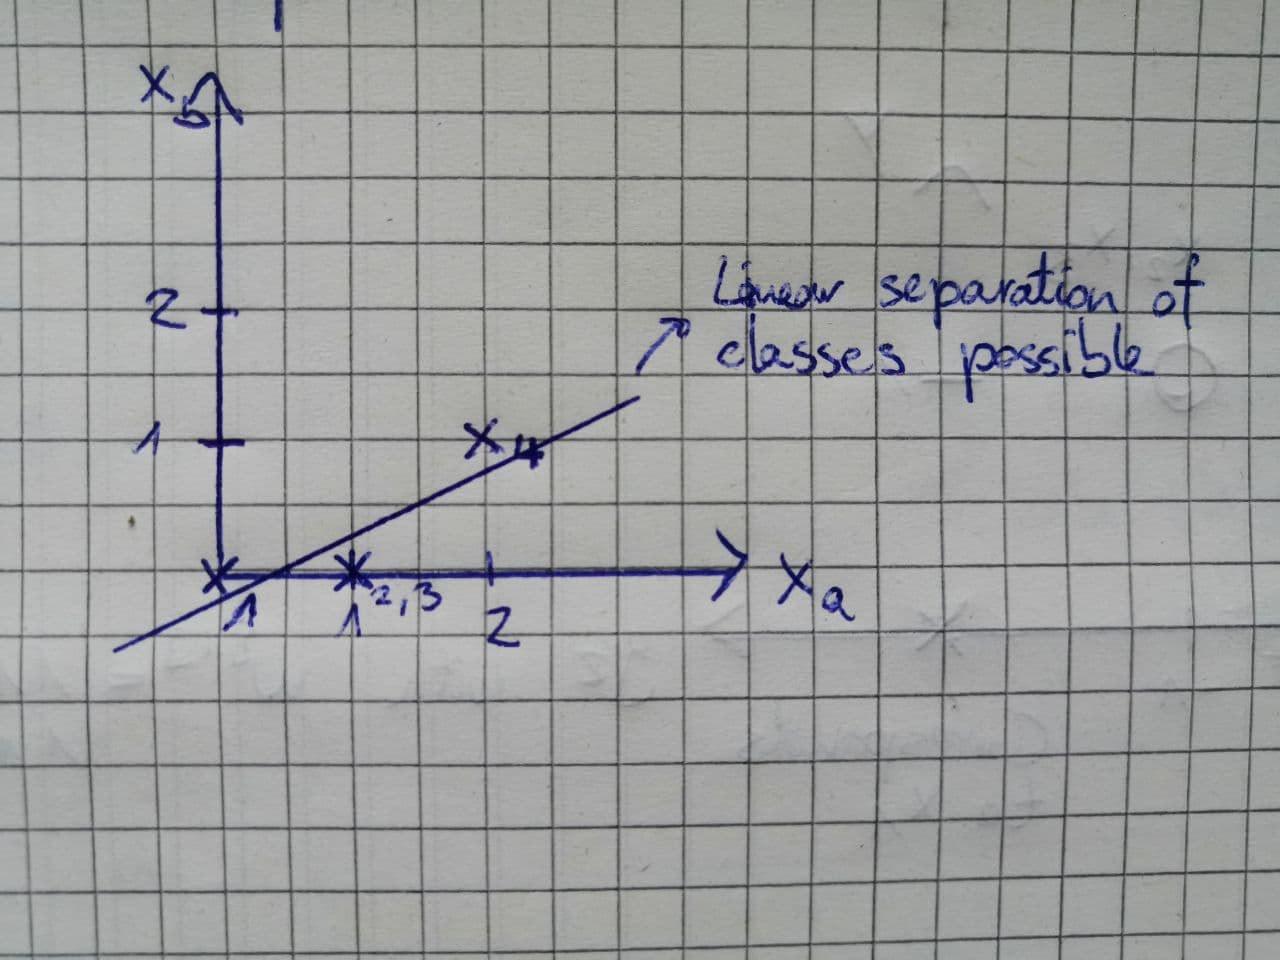
class-0-samples above example line and class-1-samples below.

Now put the observed values into the $g_2$ function:
<br><br>
Start with $x_1$:
\begin{align*}
g_2(x;W^{[1]}, W^{[2]}, b) = (1, -2)  \left(\begin{matrix}0\\ 0\end{matrix}\right) = 0 + 0 = 0 = y_1
\end{align*}

<br><br>
Go on with $x_2$:
\begin{align*}
g_2(x;W^{[1]}, W^{[2]}, b) = (1, -2) \left(\begin{matrix}1\\ 0\end{matrix}\right) = 1 \cdot 1 + (-2)\cdot0 = 1 = y_2
\end{align*}

<br><br>
Go on with $x_3$:
\begin{align*}
g_2(x;W^{[1]}, W^{[2]}, b) = (1, -2) \left(\begin{matrix}1\\ 0\end{matrix}\right) = 1\cdot 1 + (-2)\cdot0 = 1 = y_3
\end{align*}

<br><br>
Go on with $x_4$:
\begin{align*}
g_2(x;W^{[1]}, W^{[2]}, b) = (1, -2) \left(\begin{matrix}2\\ 1\end{matrix}\right) = 1\cdot2 + (-2)\cdot1 = 0 = y_4
\end{align*}

We see that the model estimates the classes of the samples without any divergence.

<h2 style="color:rgb(0,120,170)">Task 2: Backprop of a simple NN</h2>

Consider the following neural network (we try to adapt to the notation from the lecture):
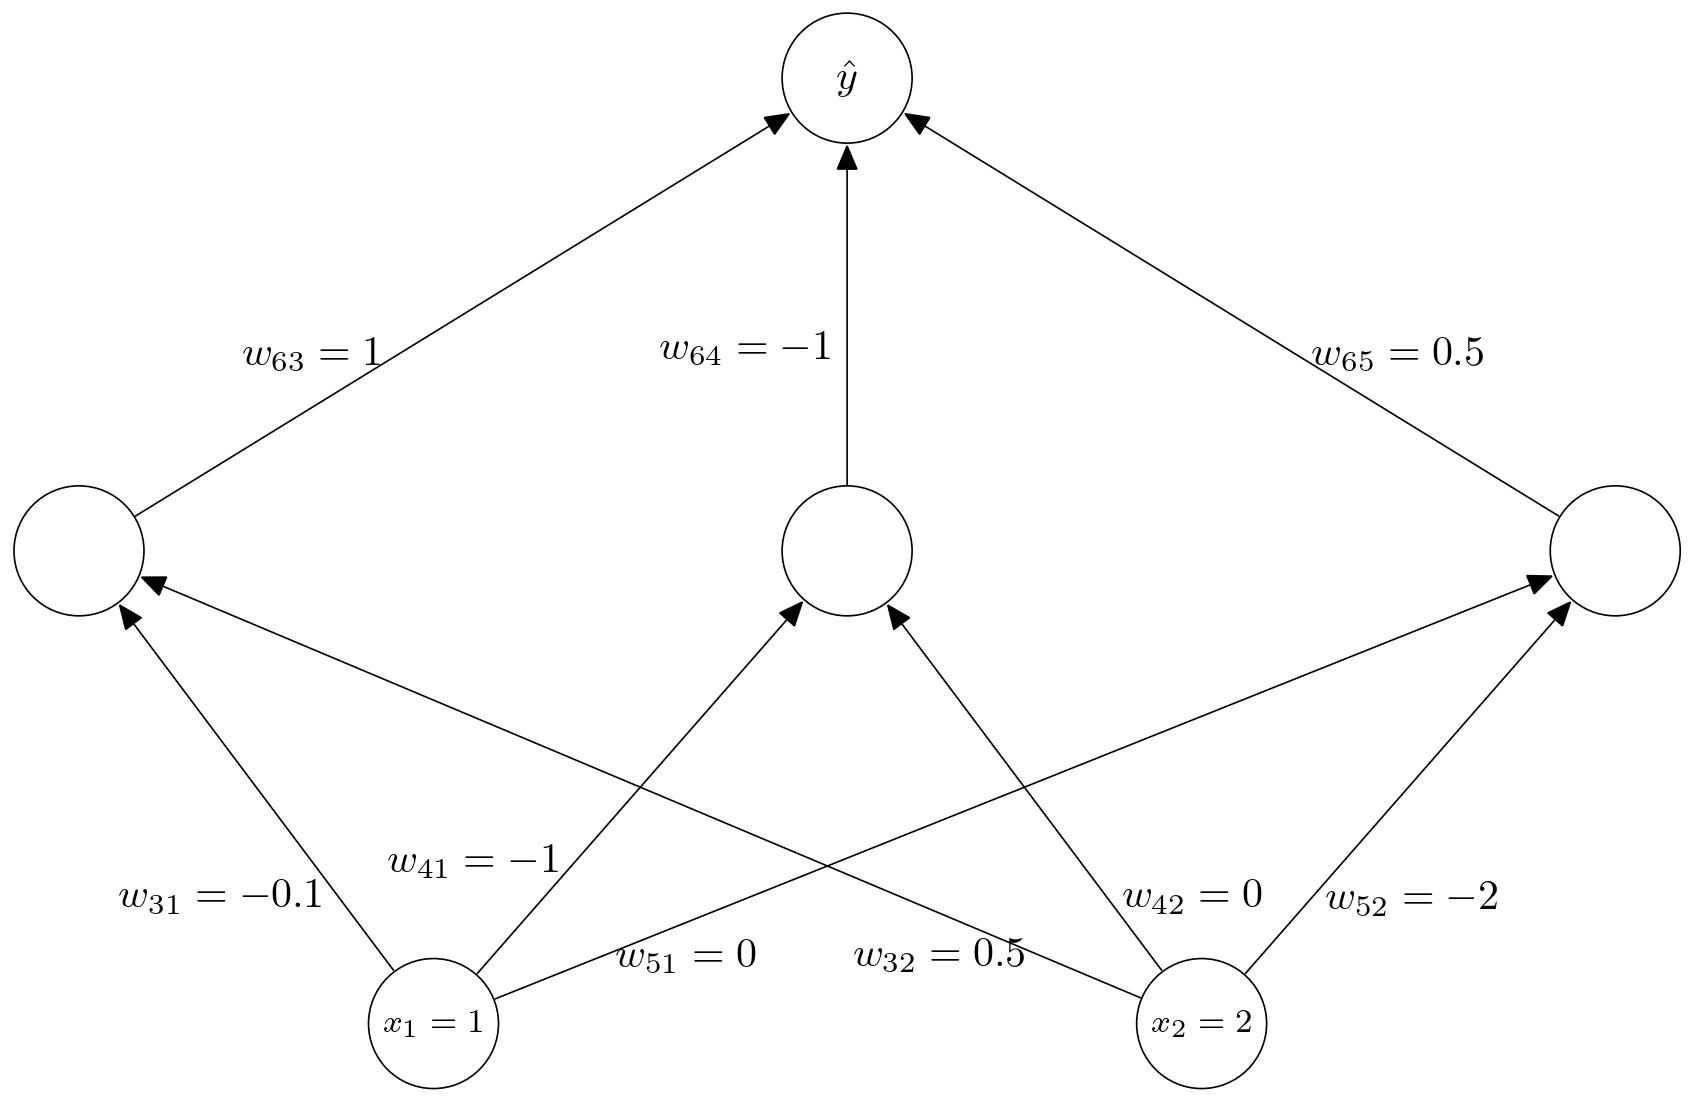
The preactivations of the hidden units are denoted as $s_3$, $s_4$ and $s_5$  from left to right, their activations as $a_3$, $a_4$ and $a_5$, respectively. In the hidden layer we use ReLU as activation function (i.e. $f_3(x)=f_4(x)=f_5(x)=\text{ReLU}(x)$), in the output layer the activation is the identity function. The preactivation of the output layer is denoted as $s_6$ and the output as $\hat{y}$. The delta at the output is denoted as $\delta_6$, and the hidden deltas as $\delta_3$, $\delta_4$ and $\delta_5$ from left to right, respectively. The true label is $y=1$ and as loss function we use the mean-squared loss , i.e $L(y,\hat{y})=\frac12 (y-\hat{y})^2$.
* Compute all outputs, preactivations, activations, and delta errors! Also compute $\frac{\partial L}{\partial w_{32}}$. Write down formulas (not only the numerical result) that indicate your computations at least for $s_3$, $\delta_3$ and $\frac{\partial L}{\partial w_{32}}$.

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

Calculate the outputs for the two inputs:<br>
Start with $x_1$ way 1:
\begin{align*}
x_1 \cdot w_{31} = 1 \cdot (-0.1) = -0.1
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, -0.1) = 0
\\
\end{align*}
The last activation function is the identity function g:
\begin{align*}
g(x) = x\\
\hat{y}_1 = g(0 \cdot w_{63}) = g(0) = 0
\end{align*}
<br>
Go on with $x_1$ way 2:
\begin{align*}
x_1 \cdot w_{41} = 1 \cdot (-1) = -1
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, -1) = 0
\\
\hat{y}_1 = g(0 \cdot w_{64}) = g(0) = 0
\end{align*}
<br>
Go on with $x_1$ way 3:
\begin{align*}
x_1 \cdot w_{51} = 1 \cdot 0 = 0
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, 0) = 0
\\
\hat{y}_1 = g(0 \cdot w_{65}) = g(0) = 0
\end{align*}
<br><br>
Go on with $x_2$ way 1:
\begin{align*}
x_2 \cdot w_{32} = 2 \cdot 0.5 = 1
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, 1) = 1
\\
\hat{y}_2 = g(1 \cdot w_{63})=g(1\cdot1) = 1
\end{align*}

Go on with $x_2$ way 2:
\begin{align*}
x_2 \cdot w_{42} = 2 \cdot 0 = 0
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, 0) = 0
\\
\hat{y}_2 = g(0 \cdot w_{64})=g(0) = 0
\end{align*}

Go on with $x_2$ way 3:
\begin{align*}
x_2 \cdot w_{52} = 2 \cdot (-2) = -4
\end{align*}
Put the finding into the relu function:
\begin{align*}
max(0, -4) = 0
\\
\hat{y}_2 = g(0 \cdot w_{65})=g(0) = 0
\end{align*}

Activations in the input layer:
\begin{align*}
a_i &= x_1\\
a_1 &= x_1 = 1\\
a_2 &= x_2 = 2
\end{align*}

Hidden layer/units: <br>
$s_1$ as network input of the i-th unit<br>
\begin{align*}
s_i &= \sum_{j=0}^{Q} w_{ij}a_j\\
s_3 &= \sum_{j=1}^{2} w_{3j}a_j = w_{31} \cdot x_1 + w_{32} \cdot x_2 = -0.1 \cdot 1 + 0.5 \cdot 2 = 0.9\\
s_4 &= \sum_{j=1}^{2} w_{4j}a_j = w_{41} \cdot x_1 + w_{42} \cdot x_2 = -1 \cdot 1 + 0 \cdot 2 = -1\\
s_5 &= \sum_{j=1}^{2} w_{5j}a_j = w_{51} \cdot x_1 + w_{52} \cdot x_2 = 0 \cdot 1 + (-2) \cdot 2 = -4\\
\end{align*}


Now we are computing the $a_i$-s for the hidden units:<br>
$a_i$ is the activation function relu which is fed with $s_i$<br>
For first hidden (and in that task we have only one) layer we get:
\begin{align*}
a^1 &= f(W^1x) = f(s^1) = relu(s^1) = max(0, s^1)\\\\
a_i &= f(s_i) = relu(s_i) = max(0, s_i)\\
a_3 &= max(0, 0.9) = 0.9\\
a_4 &= max(0, -1) = 0\\
a_5 &= max(0, -4) = 0
\end{align*}

Output layer:
\begin{align*}
s_6 &= \sum_{j=3}^{5} w_{6j}a_j = w_{63} \cdot a_3 + w_{63} \cdot a_4  + w_{65} \cdot a_5
= 1 \cdot 0.9 + (-1) \cdot 0 + 0.5 \cdot 0 = 0.9\\\\
\end{align*}

For the identity function we have:
\begin{align*}
g(x) &= x\\
y &= \sigma(W^2a^1)=\sigma(s^2)\\
\hat{y_6} &= a_6 = g(s_6) = s_6 = 0.9
\end{align*}

We know:
\begin{align*}
\hat{y}_i &= a_i
\end{align*}
We only have one $y_i$. Therefore:
\begin{align*}
L(y, \hat{y}) &= L(y,a_6) = 0.5 (y - a_6)^2 
\end{align*}

delta error for output layer (y=1 already given in instructions):
\begin{align*}
\delta_k &= \frac{\partial L(y,a_6)}{\partial a_k} g'(x)\\
\delta_6 &= \frac{\partial L(y,a_6)}{\partial a_6} g'(s_6) = 0.5 \cdot 2 \cdot (y - a_6) \cdot (-1) \cdot 1 = -(y-a_6) = a_6 -y \\
&= 0.9 -1 = -0.1
\end{align*}

delta errors for hidden units:
\begin{align*}
\delta_j &= \frac{\partial L(y,a_6)}{\partial s_j} = \sum_i \frac{\partial L(y, a_6)}{\partial s_j}\frac{\partial s_i}{\partial s_j} = f'(s_j)\sum_i \delta_i w_{ij}\\
\end{align*}

There only exists one $\delta$ in the upper output layer which is $\delta_6$, therefore:
\begin{align*}
\delta_5  = f'(s_5)\cdot \delta_6 w_{65} = max(0,1) \cdot (a_6 - y) \cdot 0.5 = max(0, 0.5) \cdot (a_6 - y) 
\end{align*}
max(0,0.5)--> 0 when input<0 else 0.5 <br>   --> $s_5 = -4$ as input, therefore we use 0
\begin{align*}
\delta_5  = 0 \cdot (0.9 - 1) = 0
\end{align*}



<br><br>
\begin{align*}
\delta_4  = f'(s_4)\cdot \delta_6 w_{64} = max(0,1) \cdot (a_6 - y) \cdot (-1) 
\end{align*}
max(0,1)--> 0 when input<0 else 1<br>    --> $s_4 = -1$ as input, therefore we use 0
\begin{align*}
\delta_4  = 0 \cdot (0.9 - 1) \cdot (-1)  = 0
\end{align*}












<br><br>
\begin{align*}
\delta_3  = f'(s_3)\cdot \delta_6 w_{63} = max(0,1) \cdot (a_6 - y) \cdot (1) = max(0,1) \cdot (a_6 - y)
\end{align*}
max(0,1)--> 0 when input<0 else 1<br>    --> $s_3 = 0.9$ as input, therefore we use 1
\begin{align*}
\delta_3  = 1 \cdot (0.9 - 1) = -0.1
\end{align*}

<br><br>Calculate
\begin{align*}
\frac{\partial L}{\partial w_{32}} &= \delta_3 a_2\\\\
a_2 &= x_2 = 2\\\\
\delta_3 &= max(0,1)\cdot (a_6-y) = 1 \cdot (a_6-y)
\end{align*}
Here we know that the input > 0 and therefore max(0,1) = 1. <br>
<br> 
\begin{align*}
\frac{\partial L}{\partial w_{32}} &= 2 \cdot (a_6-y)
\end{align*}
When y = 1 then:
\begin{align*}
\frac{\partial L}{\partial w_{32}} &= 2 \cdot (0.9 -1) = -0.2
\end{align*}

<h2 style="color:rgb(0,120,170)">Task 2: Pytorch and a visualization of the vanishing gradient problem</h2>

The aim of this task is to provide you with some familiarity with Pytorch, a Python-package which is nowadays heavily used for tasks that involve computations with neural networks. It has the nice feature that it incorporates automatic differentiation, so that you don't have to implement the backward pass for a NN any more! It also allows for transferring more involved experiments to GPUs easily, however, we won't need this nice feature here. We will again work with the Fashion MNIST data set, but this time we provide you with a Pytorch routine that can download it for you and even transforms it appropriately. 
* Your first task will be to just let the code run and plot you again some images! To this end you will need to install Pytorch appropriately in your Python library!

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Here we collect the hyperparameters we are going to use
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [3]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


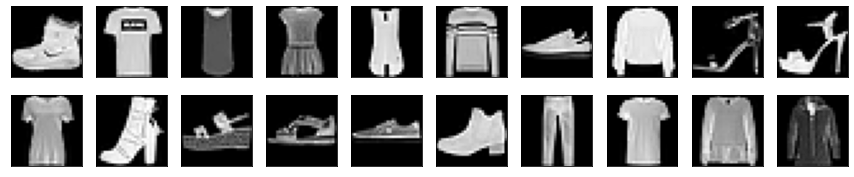

In [4]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

Next we provide you with code that you can use to create your own network in terms of a class. We will use a 3 hidden layer NN with sigmoid activation here. As you should know from the lecture sigmoid is not a very good choice as it induces vanishing gradients. 
* To overcome this issue, create a second nework class in a similar way that again has the same three linear layers but uses the ReLU activation functions which are known to prevent the gradients from vanishing instead.

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [15]:
class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        x = torch.sigmoid(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

#Your code for ReLU NN
class ANN_relu(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x)
        x = torch.relu(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)
    

Here we provide you with a routine for training a neural network with Pytorch. For each layer it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command loss.backward() automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [6]:
# This function trains the model for one epoch
# Nothing to do!
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads3 = abs(model.linear3.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads1 = abs(model.linear1.weight.grad)
        grads3_list.append(torch.mean(grads3).item())
        grads2_list.append(torch.mean(grads2).item())
        grads1_list.append(torch.mean(grads1).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print('\nTraining Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset))) 
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [7]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

Finally you are asked to execute the previously built up functions. To this end, do the following tasks:
* We provided the routine for creating the model with the sigmoid function and executing it on the cpu per default. As a first task you are now asked to create an appropriate optimizer. Use SGD with the parameters of the model and the learning rate and momentum from the hyperparameterlist args created in the beginning.
* Now execute the function train with the required arguments for the sigmoid model and create a routine that plots the output list of means of gradient magnitudes for each layer appropriately. It should also output the test accuracy. Iterate over only one epoch (default setting).
* After that create a new model and repeat the steps of the previous two points for the network class with the ReLU activations.

<h3 style="color:rgb(208,90,80)">Code (20 points)</h3>

In [8]:
# Main
print("<<<<<<< SIGMOID <<<<<<<")
model = ANN_sigmoid(input_dim, output_dim).to(device)
#Your code
optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)

<<<<<<< SIGMOID <<<<<<<


In [13]:
epoch = 1
train(args, model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.027014
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.876090
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.737389
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.786490
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.681611
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.608799
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.528511
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.545152
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.467459
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.450199

Training Accuracy: 21852/60000 (36.42%)



([0.00011617162817856297,
  0.00011786922550527379,
  0.00013145476987119764,
  0.0001702646550256759,
  0.00012926645285915583,
  0.00013000017497688532,
  0.00014018913498148322,
  0.0001239892590092495,
  0.0001421289925929159,
  0.0001419723266735673,
  0.0001328165380982682,
  0.00011697716399794444,
  0.00011115702363895252,
  0.0001404444919899106,
  0.00012997501471545547,
  0.00014624455070588738,
  0.0001494707103120163,
  0.0001313647662755102,
  0.00013015566219110042,
  0.0001363432384096086,
  0.0001612096093595028,
  0.00014616080443374813,
  0.00014456408098340034,
  0.0001453534932807088,
  0.00011619423457887024,
  0.00014211380039341748,
  0.00013951152504887432,
  0.00012984911154489964,
  0.0001252719812327996,
  0.00015521318709943444,
  0.0001126649949583225,
  0.00015574217832181603,
  0.00011012700997525826,
  0.0001419379550497979,
  0.00011785981041612104,
  0.000118582698632963,
  0.00012493456597439945,
  0.00012483965838328004,
  0.0001612914929864928,
  0

In [11]:
test(args, model, device, test_loader)


Test set: Average loss: 2.3045, Accuracy: 1000/10000 (10.00%)



Now again the same but with ReLU activation function:

In [16]:
print("<<<<<<< ReLU <<<<<<<")
model_relu = ANN_relu(input_dim, output_dim).to(device)
optimizer_relu = torch.optim.SGD(model_relu.parameters(), lr=args.lr, momentum=args.momentum)

<<<<<<< ReLU <<<<<<<


In [17]:
epoch = 1
train(args, model_relu, device, train_loader, optimizer_relu, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306659
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.135011
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.639205
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.675312
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.682085
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.483358
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.477922
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.548010
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.561712
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.616890

Training Accuracy: 44664/60000 (74.44%)



([0.0004543386457953602,
  0.000445691985078156,
  0.0004243695584591478,
  0.0004788959922734648,
  0.0004523196548689157,
  0.0004619392566382885,
  0.0004070956783834845,
  0.000478939909953624,
  0.000425514968810603,
  0.0003784551518037915,
  0.00042700310586951673,
  0.0004674952942878008,
  0.00040690251626074314,
  0.0004745181940961629,
  0.00040560466004535556,
  0.00044960572267882526,
  0.00044080393854528666,
  0.00043627622653730214,
  0.0004360060556791723,
  0.0004555136547423899,
  0.0004716429393738508,
  0.0005088758771307766,
  0.00043923064367845654,
  0.00044690599315799773,
  0.0004499762144405395,
  0.00047007057582959533,
  0.0005079389666207135,
  0.0005081075942143798,
  0.0005262236227281392,
  0.0005689646350219846,
  0.0005080481059849262,
  0.00048101949505507946,
  0.0005479435785673559,
  0.0005129934288561344,
  0.000540205161087215,
  0.0005590346991084516,
  0.0005099058616906404,
  0.0005344831733964384,
  0.0005406994605436921,
  0.000530541758053

In [18]:
test(args, model_relu, device, test_loader)


Test set: Average loss: 0.5246, Accuracy: 8127/10000 (81.27%)



<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations for the sigmoid network and the ReLU network can you make? Tick the correct boxes (several may be correct):

    
\[ X \]  The sigmoid network trains poorly in only one epoch. <br>
\[  \]  The means of magnitudes of the gradients for the sigmoid network are significantly higher for lower layers. This is an indication of the vanishing gradient problem. <br>
\[ X \] One reason why the sigmoid network can lead to vanishing gradients might be that the derivative of the sigmoid does not exceed 1/4. <br>
\[ X \]  When you use the ReLU activation function the resulting network trains well in only one epoch. <br>
\[  \] One reason why several well-known activation functions different from sigmoid can lead to more stable training can be the fact that their derivatives are always larger than 1.

However, there are possible ways to improve the learning of the sigmoid network without changing the activation function and the network size (you are encouraged to make an educated guess and try out several choices), but still, the network archictecture seems to be too easy to really lead to a satisfying performance. In the upcoming notebook we will further ellaborate on this issue.